In [8]:
# Load the two datasets
file_path_1 = r"C:\Users\clint\Desktop\data\data\university-of-british-columbia-leases-2025-04-02.csv"
file_path_2 = r"C:\Users\clint\Desktop\data\data\university-of-british-columbia-sales-2025-04-02.csv"

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

# Concatenate the datasets
combined_data = pd.concat([data_1, data_2], ignore_index=True)

# Display the first few rows of the combined data
combined_data

C:\Users\clint\AppData\Local\Temp\ipykernel_6628\846704830.py:5: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv(file_path_1)
C:\Users\clint\AppData\Local\Temp\ipykernel_6628\846704830.py:6: DtypeWarning: Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2 = pd.read_csv(file_path_2)


,Id,Property Id,Tenant Name,Street Address,City,State,Zip Code,Market,Submarket,Floor(s) Occupied,...,Buyer Rep,Property Rights,Proposed Use,Multi Tenant,Include Businesses,FAR,Percent Improved,Number Of Units,Date Created,Date Updated
0,1049.0,783,Ironwood Partners,420 Lexington Avenue,New York,NY,10017,New York City,Grand Central,Partial 23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1048.0,783,International Federation of the Red Cross,420 Lexington Avenue,New York,NY,10017,New York City,Grand Central,Partial 28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1047.0,783,Intelligent Edge Advisors,420 Lexington Avenue,New York,NY,10017,New York City,Grand Central,Partial 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1046.0,783,Informa Global Markets,420 Lexington Avenue,New York,NY,10017,New York City,Grand Central,Partial 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1045.0,783,FMV Opinions,420 Lexington Avenue,New York,NY,10017,New York City,Grand Central,Partial 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732645,NaN,3608517,NaN,777 Main Street,Frisco,TX,75036,Dallas - Ft. Worth,Frisco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-19,2025-04-01
1732646,NaN,3608526,NaN,811 East Parmenter Street,Lamar,CO,81052-3583,Colorado - Other,Colorado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-19,2025-03-31
1732647,NaN,3608445,NaN,2248 West Ironwood Center Drive,Coeur d'Alene,ID,83814-2697,Idaho - Other,Idaho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-19,2025-03-31
1732648,NaN,3608520,NaN,5090 60th Street Southeast,Grand Rapids,MI,49512-9732,Michigan - Other,Michigan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2025-03-19,2025-03-27


In [24]:
combined_data['Building Class'].unique()

array(['B', 'A', 'C', nan], dtype=object)

In [25]:
combined_data['Building Class'].isna().sum()

np.int64(467296)

In [26]:
# Get value counts of Building Class to see distribution (including NaN values)
building_class_counts = combined_data['Building Class'].value_counts(dropna=False)
print(f"Total number of records: {len(combined_data)}")
print(f"Number of NaN values: {combined_data['Building Class'].isna().sum()}")
print("\nFrequency count of each Building Class (including NaN):")
building_class_counts

Total number of records: 1732650
Number of NaN values: 467296

Frequency count of each Building Class (including NaN):


Building Class
B      609737
NaN    467296
A      433383
C      222234
Name: count, dtype: int64

In [27]:
# Calculate percentage distribution of Building Class
building_class_percentage = combined_data['Building Class'].value_counts(normalize=True, dropna=False) * 100
building_class_percentage

Building Class
B      35.191008
NaN    26.970017
A      25.012726
C      12.826249
Name: proportion, dtype: float64

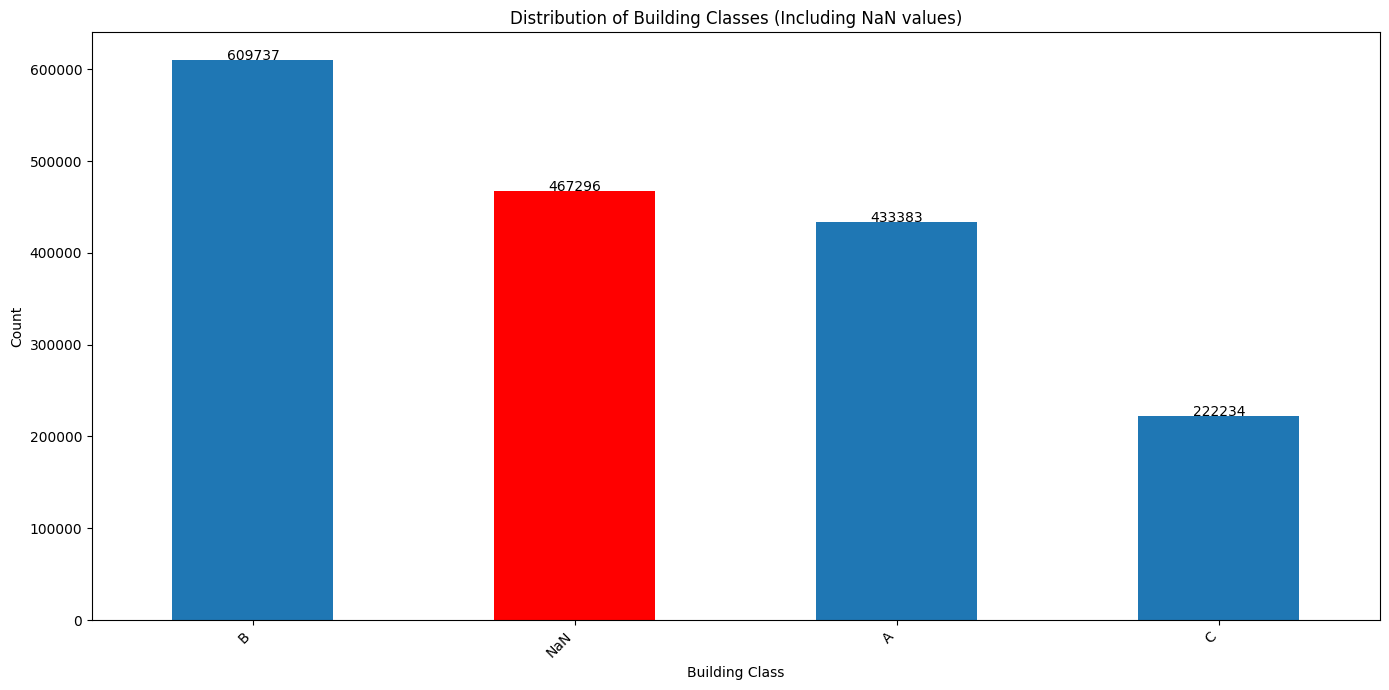

In [28]:
# Visualize the distribution of Building Class (including NaN values)
import matplotlib.pyplot as plt
import numpy as np

# Get value counts including NaN values
building_class_counts_with_nan = combined_data['Building Class'].value_counts(dropna=False)

plt.figure(figsize=(14, 7))
ax = building_class_counts_with_nan.plot(kind='bar')

# Replace NaN index label with 'NaN' for display
x_labels = list(building_class_counts_with_nan.index)
for i, label in enumerate(x_labels):
    if pd.isna(label):
        x_labels[i] = 'NaN'
        # Optionally highlight the NaN bar with a different color
        ax.patches[i].set_facecolor('red')

ax.set_xticklabels(x_labels)

# Add count values on top of each bar
for i, v in enumerate(building_class_counts_with_nan):
    ax.text(i, v + 5, str(v), ha='center')

plt.title('Distribution of Building Classes (Including NaN values)')
plt.xlabel('Building Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Analyze Building Class by Property Type
# Create a cross-tabulation to see how Building Class relates to Property Type
building_class_by_property_type = pd.crosstab(combined_data['Building Class'], 
                                             combined_data['Property Type'], 
                                             margins=True, 
                                             margins_name='Total')
building_class_by_property_type

Property Type,Hotel,Industrial,Land,Mixed-Use,Multi-Family,Office,Other,Retail,Total
Building Class,,,,,,,,,
A,324,66398,904,3449,12130,336171,415,13012,432803
B,923,208315,1290,2144,11927,341018,1025,41446,608088
C,458,114613,861,867,15588,58034,722,30167,221310
Total,1705,389326,3055,6460,39645,735223,2162,84625,1262201


In [15]:
# Calculate average transaction size by Building Class
avg_transaction_by_class = combined_data.groupby('Building Class')['Transaction SQFT'].mean().sort_values(ascending=False)
avg_transaction_by_class

Building Class
A    91103.583946
B    75346.321985
C    47787.643736
Name: Transaction SQFT, dtype: float64

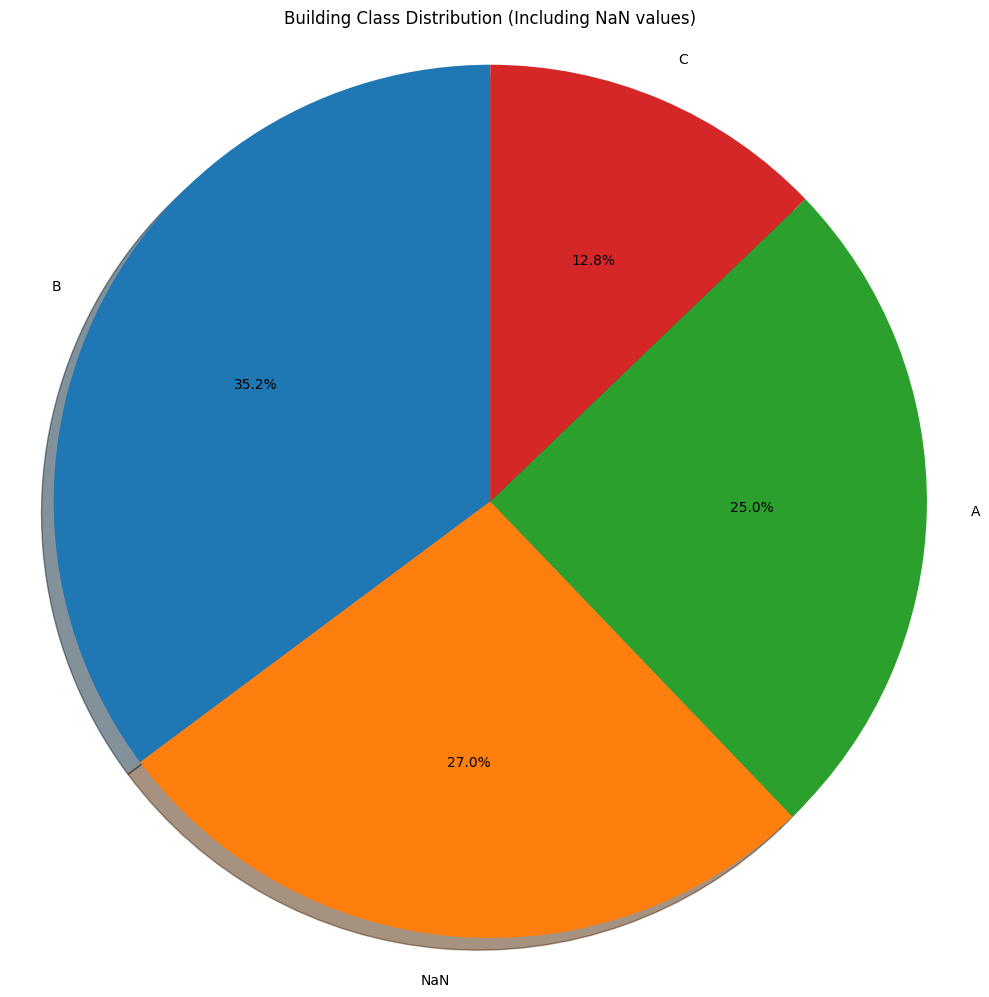

In [22]:
# Create a pie chart to visualize Building Class distribution including NaN values
plt.figure(figsize=(10, 10))
building_class_counts = combined_data['Building Class'].value_counts(dropna=False)
labels = building_class_counts.index.tolist()
# Replace NaN label with 'NaN' text for display
labels = ['NaN' if pd.isna(x) else x for x in labels]

plt.pie(building_class_counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Building Class Distribution (Including NaN values)')
plt.tight_layout()
plt.show()

In [38]:
# Create a table showing both counts and percentages
building_class_summary = pd.DataFrame({
    'Count': combined_data['Building Class'].value_counts(dropna=False),
    'Percentage': combined_data['Building Class'].value_counts(normalize=True, dropna=False) * 100
})
building_class_summary['Percentage'] = building_class_summary['Percentage'].round(2)
building_class_summary = building_class_summary.sort_values('Count', ascending=False)
building_class_summary.reset_index(name='Building Class')

# Rename the index for NaN values for better readability
building_class_summary = building_class_summary.rename(index={np.nan: 'NaN (Missing Value)'})
building_class_summary

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [39]:
# Enhanced visualization of Building Class and Property Type relationship
import seaborn as sns

# Create a cross-tabulation with percentages
cross_tab_percent = pd.crosstab(combined_data['Building Class'], 
                              combined_data['Property Type'], 
                              normalize='columns') * 100
cross_tab_percent = cross_tab_percent.round(1)

# Replace NaN index with 'Missing' for better readability
if pd.isna(cross_tab_percent.index).any():
    cross_tab_percent = cross_tab_percent.reset_index()
    cross_tab_percent['Building Class'] = cross_tab_percent['Building Class'].fillna('Missing')
    cross_tab_percent = cross_tab_percent.set_index('Building Class')

# Display percentage distribution
print("Percentage distribution of Building Classes within each Property Type:")
cross_tab_percent

Percentage distribution of Building Classes within each Property Type:


Property Type,Hotel,Industrial,Land,Mixed-Use,Multi-Family,Office,Other,Retail
Building Class,,,,,,,,
A,19.0,17.1,29.6,53.4,30.6,45.7,19.2,15.4
B,54.1,53.5,42.2,33.2,30.1,46.4,47.4,49.0
C,26.9,29.4,28.2,13.4,39.3,7.9,33.4,35.6


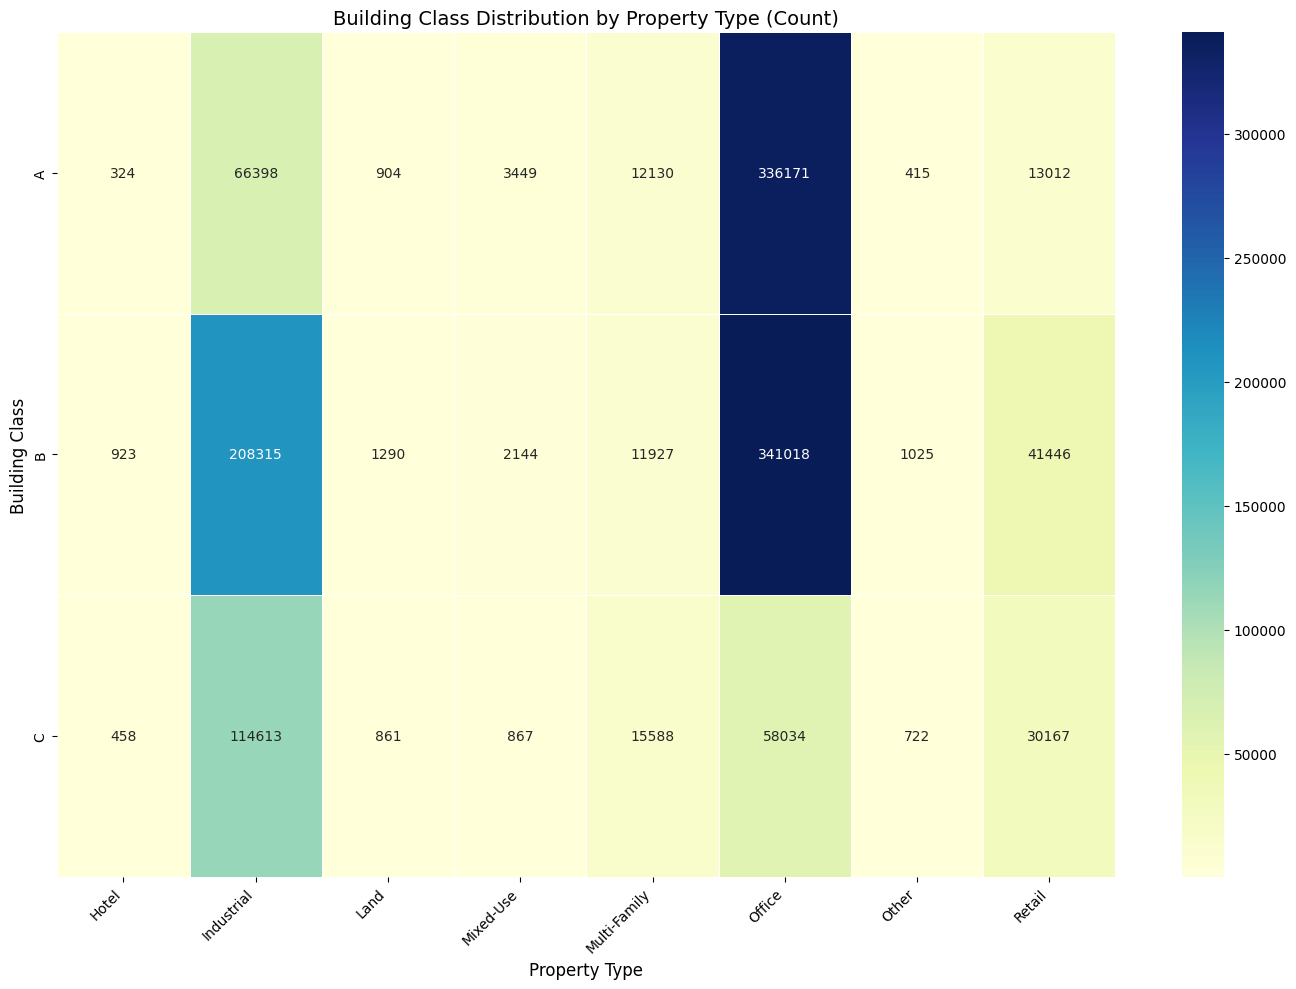

In [32]:
# Create a heatmap visualization of Building Class by Property Type
plt.figure(figsize=(14, 10))

# Create crosstab for counts (absolute numbers)
cross_tab_counts = pd.crosstab(combined_data['Building Class'], combined_data['Property Type'])

# Replace NaN index with 'Missing' for better readability if it exists
if pd.isna(cross_tab_counts.index).any():
    cross_tab_counts = cross_tab_counts.reset_index()
    cross_tab_counts['Building Class'] = cross_tab_counts['Building Class'].fillna('Missing')
    cross_tab_counts = cross_tab_counts.set_index('Building Class')

# Create the heatmap
ax = sns.heatmap(cross_tab_counts, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Building Class Distribution by Property Type (Count)', fontsize=14)
plt.ylabel('Building Class', fontsize=12)
plt.xlabel('Property Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

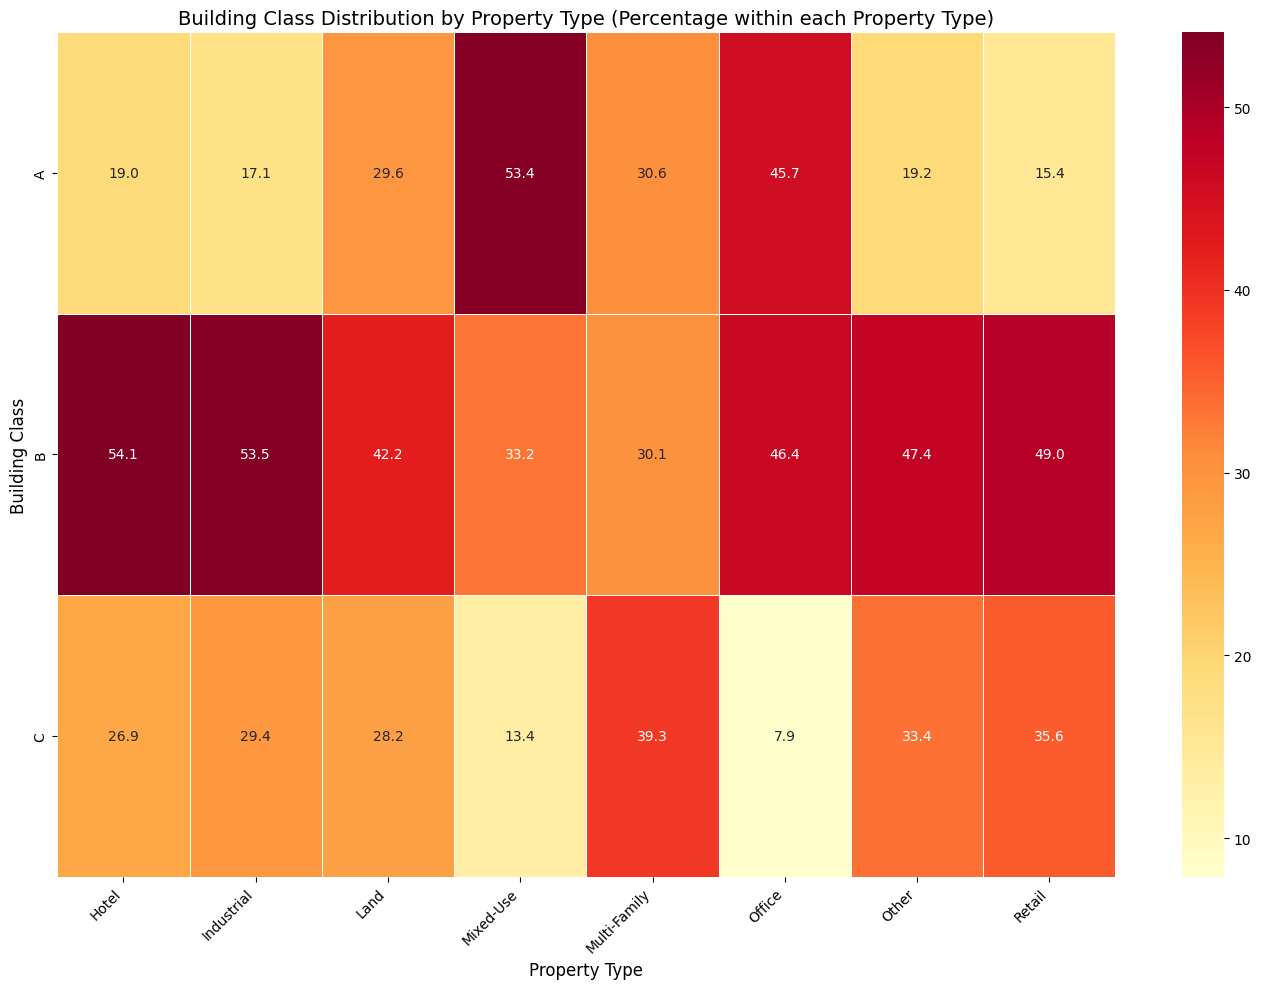

In [33]:
# Create a heatmap visualization of Building Class by Property Type (percentage)
plt.figure(figsize=(14, 10))

# Create the heatmap for percentage distribution
ax = sns.heatmap(cross_tab_percent, cmap="YlOrRd", annot=True, fmt='.1f', linewidths=.5)
plt.title('Building Class Distribution by Property Type (Percentage within each Property Type)', fontsize=14)
plt.ylabel('Building Class', fontsize=12)
plt.xlabel('Property Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

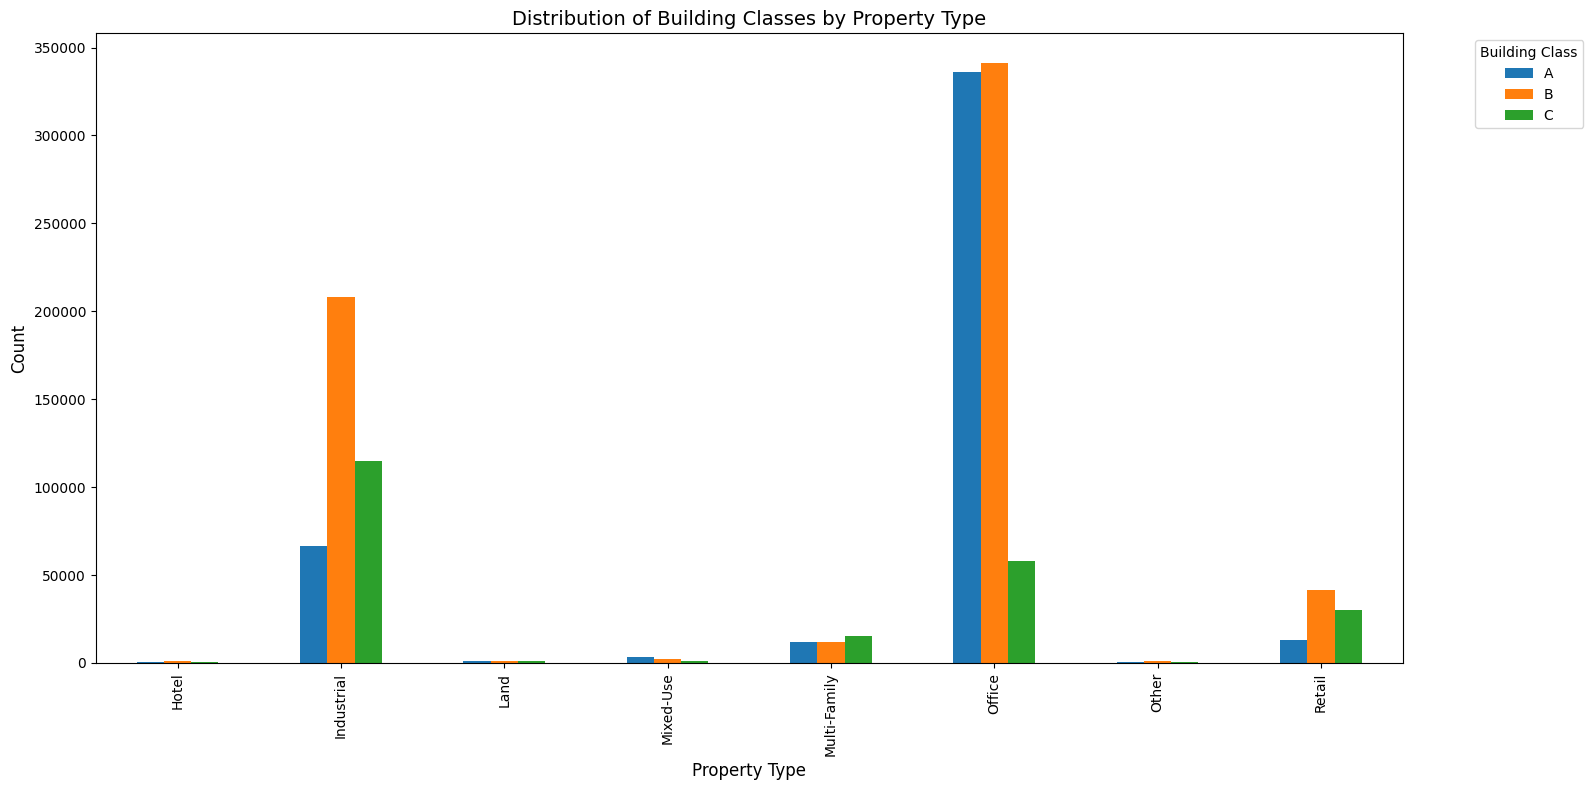

In [34]:
# Create a grouped bar chart to show the distribution of Building Classes within each Property Type

# Prepare the data by reshaping it
pivot_data = pd.crosstab(combined_data['Property Type'], combined_data['Building Class'])

# Replace NaN column with 'Missing' for better readability if it exists
if pd.isna(pivot_data.columns).any():
    pivot_data = pivot_data.rename(columns={pd.NA: 'Missing'})

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(16, 8))
plt.title('Distribution of Building Classes by Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Building Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

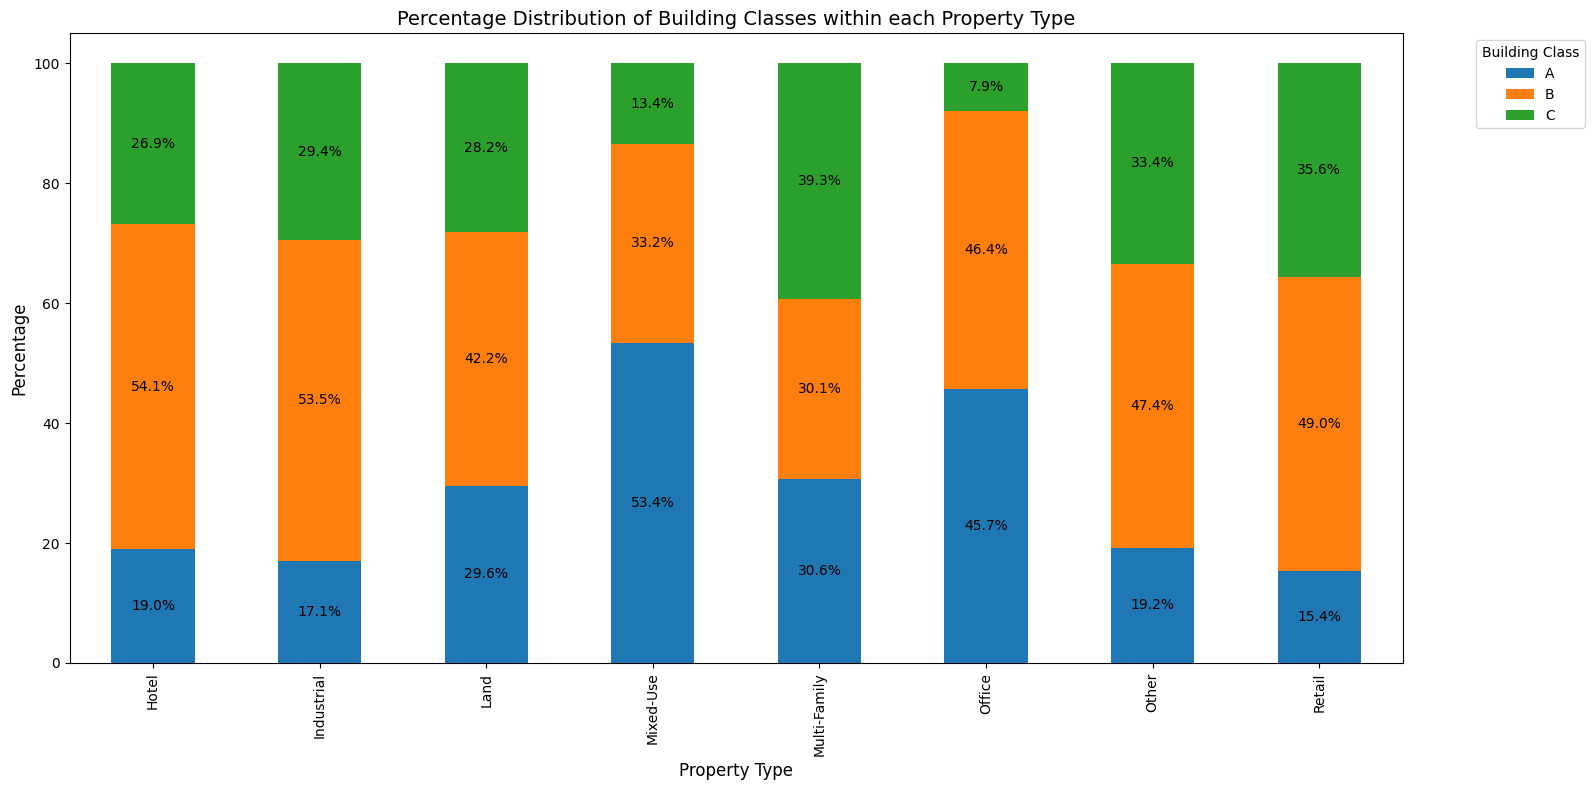

In [35]:
# Create a stacked percentage bar chart
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
ax = pivot_percent.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Percentage Distribution of Building Classes within each Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Building Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on bars
for c in ax.containers:
    # Filter out small or zero percentages to avoid cluttering
    labels = ['%.1f%%' % v if v > 5 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

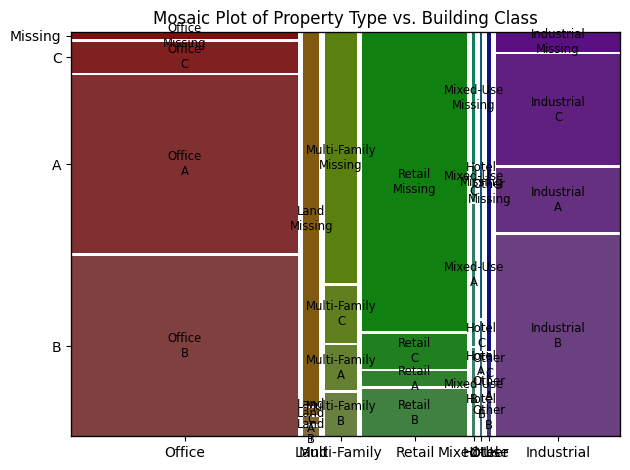

In [36]:
# Create a mosaic plot to visualize the relationship between Building Class and Property Type
from statsmodels.graphics.mosaicplot import mosaic

# Create a contingency table for Building Class and Property Type
# First, create a copy of the data with NaN filled for visualization purposes
viz_data = combined_data[['Building Class', 'Property Type']].copy()
viz_data['Building Class'] = viz_data['Building Class'].fillna('Missing')

# Create figure
plt.figure(figsize=(16, 10))

# Generate mosaic plot
mosaic(viz_data, ['Property Type', 'Building Class'], title='Mosaic Plot of Property Type vs. Building Class',
       gap=0.01, axes_label=True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Statistical test to see if there's a significant relationship between Building Class and Property Type
from scipy.stats import chi2_contingency

# Create a contingency table (excluding NaN values for proper statistical testing)
contingency_table = pd.crosstab(combined_data['Building Class'].dropna(), 
                              combined_data['Property Type'].dropna())

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2:.2f}")
print(f"p-value: {p:.10f}")
print(f"Degrees of freedom: {dof}")
print("")

# Interpret the results
alpha = 0.05
print(f"Significance level: {alpha}")
if p <= alpha:
    print("Conclusion: There is a statistically significant relationship between Building Class and Property Type.")
else:
    print("Conclusion: There is no statistically significant relationship between Building Class and Property Type.")

Chi-square test statistic: 175203.18
p-value: 0.0000000000
Degrees of freedom: 14

Significance level: 0.05
Conclusion: There is a statistically significant relationship between Building Class and Property Type.


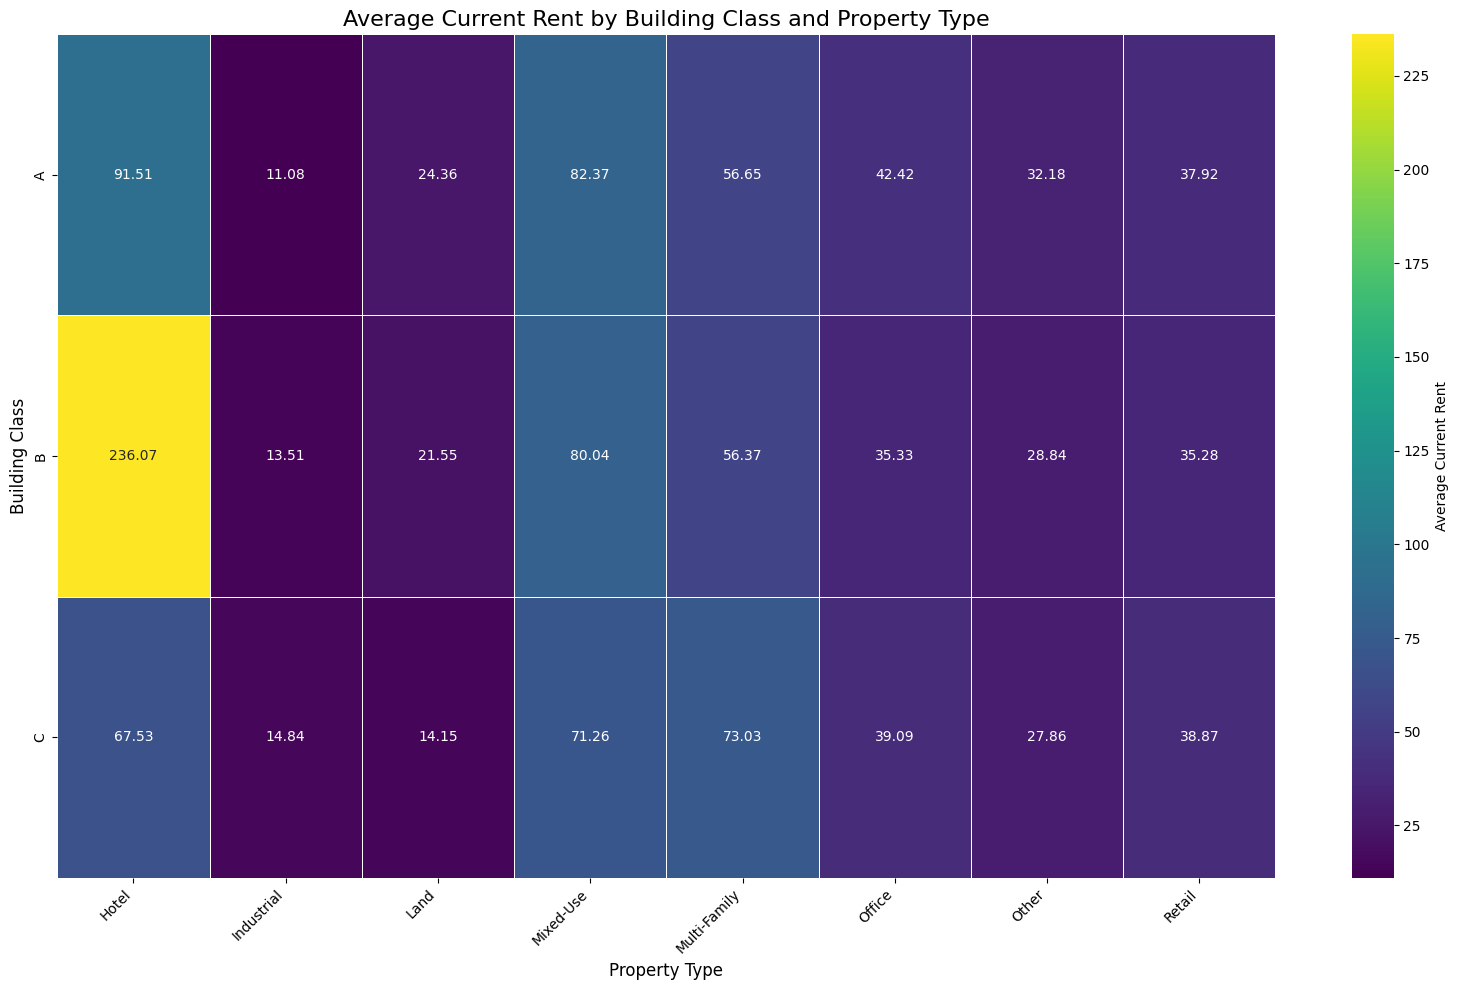


Actual Average Current Rent Values (NaN indicates no data):


Property Type,Hotel,Industrial,Land,Mixed-Use,Multi-Family,Office,Other,Retail
Building Class,,,,,,,,
A,91.51160,11.075090,24.359444,82.374238,56.645813,42.421425,32.183654,37.924331
B,236.07125,13.513471,21.545471,80.040042,56.373058,35.332492,28.836738,35.281217
C,67.53000,14.844983,14.146972,71.256667,73.034804,39.088643,27.857391,38.873014


In [41]:
# Create a heatmap of Current Rent by Building Class and Property Type
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Check if Current Rent column exists
if 'Current Rent' in combined_data.columns:
    # Create a pivot table with Building Class as rows, Property Type as columns, and Current Rent as values
    pivot_rent = combined_data.pivot_table(
        values='Current Rent',
        index='Building Class', 
        columns='Property Type',
        aggfunc='mean'  # Using mean rent for each combination
    )
    
    # Fill NaN values with 0 for visualization purposes
    pivot_rent_filled = pivot_rent.fillna(0)
    
    # Create heatmap
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(
        pivot_rent_filled, 
        cmap='viridis', 
        annot=True, 
        fmt='.2f',  # Format to show 2 decimal places
        linewidths=.5,
        cbar_kws={'label': 'Average Current Rent'}
    )
    
    # Add a title and labels
    plt.title('Average Current Rent by Building Class and Property Type', fontsize=16)
    plt.ylabel('Building Class', fontsize=12)
    plt.xlabel('Property Type', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show 'Missing' instead of NaN in the x-axis and y-axis labels
    x_labels = [item.get_text() if item.get_text() != '' else 'NaN' for item in ax.get_xticklabels()]
    y_labels = [item.get_text() if item.get_text() != '' else 'NaN' for item in ax.get_yticklabels()]
    
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    plt.tight_layout()
    plt.show()
    
    # Display the raw data without the fillna()
    print("\nActual Average Current Rent Values (NaN indicates no data):")
    display(pivot_rent)
else:
    print("'Current Rent' column not found in the dataset. Please check your data.")

    # For debugging - show all available columns
    print("\nAvailable columns in the dataset:")
    print(combined_data.columns.tolist())

Potential rent or price related columns:
['Starting Rent', 'Adjusted Starting Rent', 'Net Effective Rent', 'Adjusted Effective Rent', 'Current Rent', 'Asking Rent', 'Average Rent', 'Blended Rent', 'Rent Schedule', 'Rent Bump Percent', 'Rent Bump Dollar', 'Rent Bump Year', 'Free Rent', 'Free Rent Type', 'Office Portion Rent', 'Percentage Rent', 'Asking Rent (Gross Annual)', 'Starting Rent (Gross Annual)', 'Total Sale Price', 'Sale Price (PSF)', 'Total Asking Price', 'Asking Price']
Column 'Starting Rent' has numeric data with 1142097 non-null values
Column 'Adjusted Starting Rent' has numeric data with 1141893 non-null values
Column 'Net Effective Rent' has numeric data with 1143013 non-null values
Column 'Adjusted Effective Rent' has numeric data with 1124691 non-null values
Column 'Current Rent' has numeric data with 275584 non-null values
Column 'Asking Rent' has numeric data with 48712 non-null values
Column 'Average Rent' has numeric data with 39147 non-null values
Column 'Blended 

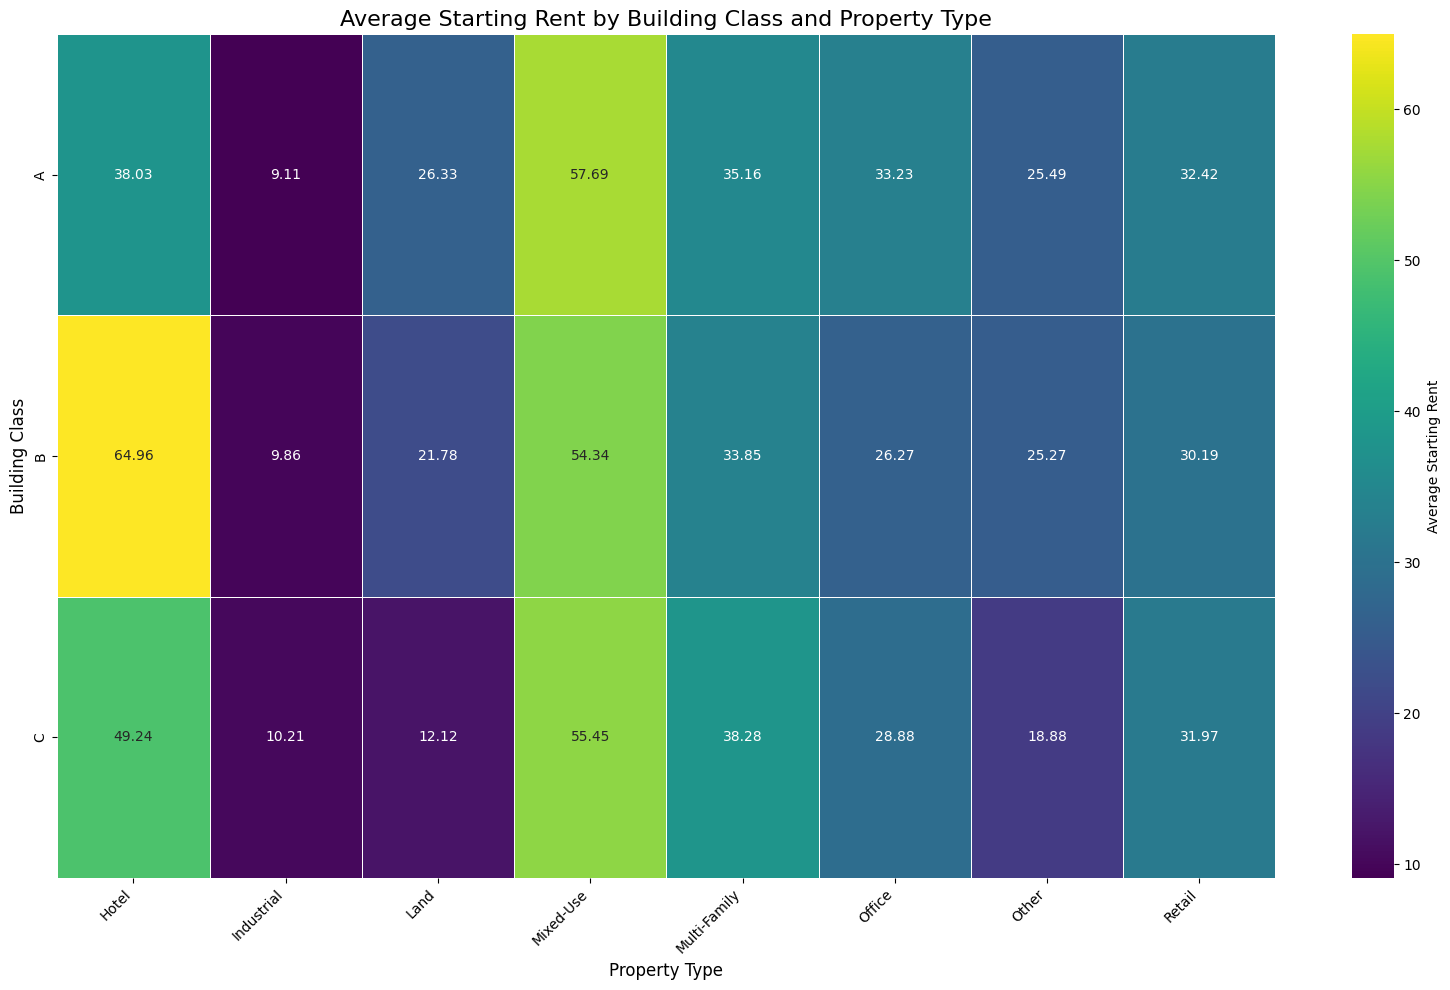

In [42]:
# Create an alternative visualization if Current Rent is not available
# Try to identify another numeric field related to rent that we could use instead

# List potential rent-related columns
rent_columns = [col for col in combined_data.columns if 'rent' in col.lower() or 'price' in col.lower()]
print("Potential rent or price related columns:")
print(rent_columns)

# Check which ones have numeric data
numeric_rent_columns = []
for col in rent_columns:
    if col in combined_data.columns:
        try:
            # Check if column can be converted to numeric
            combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')
            if not combined_data[col].isna().all():  # Check if all values are not NaN
                numeric_rent_columns.append(col)
                print(f"Column '{col}' has numeric data with {combined_data[col].count()} non-null values")
        except:
            print(f"Column '{col}' cannot be converted to numeric data")

# If we found any numeric rent columns, use the first one for visualization
if numeric_rent_columns:
    selected_column = numeric_rent_columns[0]
    
    # Create a pivot table with Building Class as rows, Property Type as columns, and the selected rent column as values
    pivot_alt = combined_data.pivot_table(
        values=selected_column,
        index='Building Class', 
        columns='Property Type',
        aggfunc='mean'  # Using mean for each combination
    )
    
    # Fill NaN values with 0 for visualization purposes
    pivot_alt_filled = pivot_alt.fillna(0)
    
    # Create heatmap
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(
        pivot_alt_filled, 
        cmap='viridis', 
        annot=True, 
        fmt='.2f',  # Format to show 2 decimal places
        linewidths=.5,
        cbar_kws={'label': f'Average {selected_column}'}
    )
    
    # Add a title and labels
    plt.title(f'Average {selected_column} by Building Class and Property Type', fontsize=16)
    plt.ylabel('Building Class', fontsize=12)
    plt.xlabel('Property Type', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show 'Missing' instead of NaN in the x-axis and y-axis labels
    x_labels = [item.get_text() if item.get_text() != '' else 'NaN' for item in ax.get_xticklabels()]
    y_labels = [item.get_text() if item.get_text() != '' else 'NaN' for item in ax.get_yticklabels()]
    
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable rent-related numeric columns found for visualization")

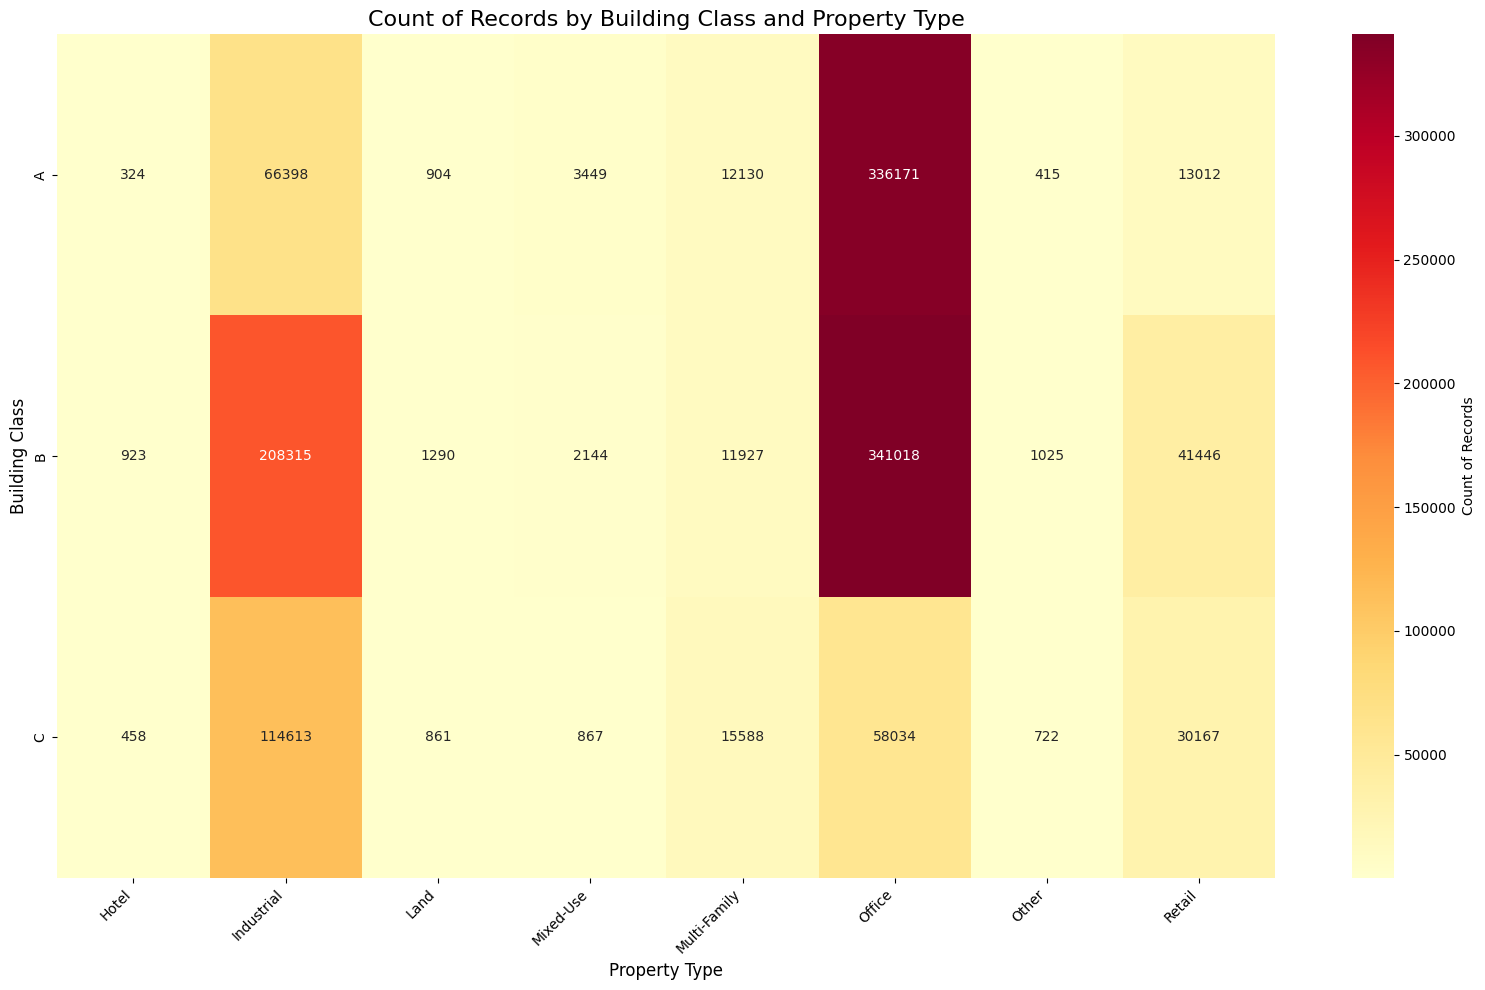

In [43]:
# Create a count heatmap to identify where we have the most data points

# Create a cross-tabulation to count occurrences of each Building Class-Property Type combination
count_matrix = pd.crosstab(combined_data['Building Class'], combined_data['Property Type'])

# Replace NaN index with 'Missing' for better readability if it exists
if pd.isna(count_matrix.index).any():
    count_matrix = count_matrix.reset_index()
    count_matrix['Building Class'] = count_matrix['Building Class'].fillna('Missing')
    count_matrix = count_matrix.set_index('Building Class')

# Create heatmap of counts
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    count_matrix, 
    cmap='YlOrRd', 
    annot=True, 
    fmt='d',  # Format as integers
    cbar_kws={'label': 'Count of Records'}
)

plt.title('Count of Records by Building Class and Property Type', fontsize=16)
plt.ylabel('Building Class', fontsize=12)
plt.xlabel('Property Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()